# Analysing Trustpilot Reviews:  <img src="Ocado Logo.PNG" width="100" height="50">

I was pretty suprised to see not only Ocado, but other grocery stores as well, were rated pretty low on Trustpilot.

<img src="Rating - Copy.PNG" width="250" height="125">

This may be due to a phenomenon called "negativity bias," where our brains tend to prioritize and remember negative experiences more strongly than positive ones, leading to a greater urge to express dissatisfaction when something goes wrong. Therefore, customers are more inclined to write negative reviews than positive reviews because of the heightened emotional response.

<img src="Rating Other.PNG" width="300" height="250">

## Download Packages 

In [375]:
import numpy as np
import pandas as pd

from bs4 import BeautifulSoup
import requests

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Web Scraping

In [132]:
# OCADO: 765 pages in total

data = []
# Set Trustpilot page numbers to scrape here
from_page = 1
to_page = 20

for i in range(from_page, to_page + 1):
    response = requests.get(f"https://uk.trustpilot.com/review/www.ocado.com?page={i}")
    web_page = response.text
    soup = BeautifulSoup(web_page, "html.parser")

    for e in soup.select('article'):
        data.append({
            'review_title':e.h2.text,
            'review_date_original': e.select_one('[data-service-review-date-of-experience-typography]').text.split(': ')[-1],
            'review_rating':e.select_one('[data-service-review-rating] img').get('alt'),
            'review_text': e.select_one('[data-service-review-text-typography]').text if e.select_one('[data-service-review-text-typography]') else None,
            'page_number':i
        })

pd.DataFrame(data)

,review_title,review_date_original,review_rating,review_text,page_number
0,Poor substitution choices,28 December 2024,Rated 2 out of 5 stars,I am very disappointed at the substitution dec...,1
1,Stock issues and poor quality,24 December 2024,Rated 2 out of 5 stars,Two stars for the delivery driver as they are ...,1
2,The turkey stole the show,23 December 2024,Rated 5 out of 5 stars,Been shopping with Ocado for four years now an...,1
3,Useless.,29 December 2024,Rated 1 out of 5 stars,"Easy to order, took advantage of a few deals e...",1
4,"Order Xmas items in Oct, don't arrive in Dec",22 December 2024,Rated 2 out of 5 stars,Xmas order had a cut off date of 15th Dec for ...,1
...,...,...,...,...,...
395,If I could leave 0 stars I would…,18 August 2024,Rated 1 out of 5 stars,If I could leave 0 stars I would…We are a regu...,20
396,Excellent service in every respect,15 August 2024,Rated 5 out of 5 stars,Excellent delivery service. On timeExcellent p...,20
397,Shocked and AppalledI,10 August 2024,Rated 1 out of 5 stars,I tried Ocado after having some very poor subs...,20
398,Don't care about loyal customers,14 August 2024,Rated 1 out of 5 stars,As a customer of many years who has been very ...,20


In [138]:
ocado = pd.DataFrame(data)

ocado.head()

,review_title,review_date_original,review_rating,review_text,page_number
0,Poor substitution choices,28 December 2024,Rated 2 out of 5 stars,I am very disappointed at the substitution dec...,1
1,Stock issues and poor quality,24 December 2024,Rated 2 out of 5 stars,Two stars for the delivery driver as they are ...,1
2,The turkey stole the show,23 December 2024,Rated 5 out of 5 stars,Been shopping with Ocado for four years now an...,1
3,Useless.,29 December 2024,Rated 1 out of 5 stars,"Easy to order, took advantage of a few deals e...",1
4,"Order Xmas items in Oct, don't arrive in Dec",22 December 2024,Rated 2 out of 5 stars,Xmas order had a cut off date of 15th Dec for ...,1


In [154]:
ocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   review_title          400 non-null    object
 1   review_date_original  400 non-null    object
 2   review_rating         400 non-null    object
 3   review_text           399 non-null    object
 4   page_number           400 non-null    int64 
 5   rating                400 non-null    object
dtypes: int64(1), object(5)
memory usage: 18.9+ KB


In [139]:
#ocado['review_rating'].str.find(' ')+1

In [140]:
newlist = []

for i in ocado['review_rating']:
    j = i[6:7]
    newlist.append(j)


In [141]:
ocado['rating'] = newlist

In [142]:
ocado[[
    'review_title',
    'review_date_original',
    'review_rating',
    'review_text',
    'page_number',
    'rating']
]

#.columns.tolist()

,review_title,review_date_original,review_rating,review_text,page_number,rating
0,Poor substitution choices,28 December 2024,Rated 2 out of 5 stars,I am very disappointed at the substitution dec...,1,2
1,Stock issues and poor quality,24 December 2024,Rated 2 out of 5 stars,Two stars for the delivery driver as they are ...,1,2
2,The turkey stole the show,23 December 2024,Rated 5 out of 5 stars,Been shopping with Ocado for four years now an...,1,5
3,Useless.,29 December 2024,Rated 1 out of 5 stars,"Easy to order, took advantage of a few deals e...",1,1
4,"Order Xmas items in Oct, don't arrive in Dec",22 December 2024,Rated 2 out of 5 stars,Xmas order had a cut off date of 15th Dec for ...,1,2
...,...,...,...,...,...,...
395,If I could leave 0 stars I would…,18 August 2024,Rated 1 out of 5 stars,If I could leave 0 stars I would…We are a regu...,20,1
396,Excellent service in every respect,15 August 2024,Rated 5 out of 5 stars,Excellent delivery service. On timeExcellent p...,20,5
397,Shocked and AppalledI,10 August 2024,Rated 1 out of 5 stars,I tried Ocado after having some very poor subs...,20,1
398,Don't care about loyal customers,14 August 2024,Rated 1 out of 5 stars,As a customer of many years who has been very ...,20,1


In [173]:
ocado_december = ocado[ocado['review_date_original'].str.contains('December')] # total of 187 reviews for December

In [175]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk # natural language tool kit
nltk.download('punkt') # tokenizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hande\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [179]:
december_token_counts = CountVectorizer(min_df=1, tokenizer=nltk.word_tokenize) 

remarks_as_sparse_vector = december_token_counts.fit_transform(ocado_december['review_text'])

december_token_counts.vocabulary_

C:\Users\hande\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'i': 801,
 'am': 165,
 'very': 1646,
 'disappointed': 506,
 'at': 208,
 'the': 1525,
 'substitution': 1469,
 'decisions': 463,
 'by': 295,
 'ocado': 1057,
 '.': 28,
 'they': 1531,
 'did': 496,
 "n't": 1021,
 'have': 753,
 'my': 1019,
 'usual': 1629,
 'brand': 275,
 'of': 1066,
 'bread': 278,
 'so': 1413,
 'it': 849,
 'was': 1665,
 'replaced': 1292,
 'with': 1713,
 'a': 105,
 'poor': 1171,
 'quality': 1227,
 'one': 1080,
 'never': 1031,
 'bought': 268,
 'why': 1705,
 'ca': 296,
 'look': 930,
 'back': 218,
 'customer': 442,
 "'s": 16,
 'previous': 1190,
 'shops': 1386,
 "'d": 7,
 'rather': 1238,
 'nothing': 1043,
 'than': 1519,
 'awful': 217,
 'choices': 357,
 'made': 948,
 'on': 1076,
 'behalf': 236,
 'two': 1591,
 'stars': 1444,
 'for': 666,
 'delivery': 480,
 'driver': 536,
 'as': 201,
 'are': 192,
 'always': 164,
 'polite': 1170,
 'and': 171,
 'without': 1715,
 'them': 1527,
 ',': 21,
 'rating': 1239,
 'would': 1728,
 'be': 229,
 'lower': 942,
 'has': 748,
 'deteriorated': 492,
 'co

In [203]:
december_token_counts_1 = CountVectorizer(min_df=1, tokenizer=nltk.word_tokenize) 

remarks_as_sparse_vector_1 = december_token_counts_1.fit_transform(
    ocado_december[ocado_december['rating'] == '1']['review_text']
)

december_token_counts_1.vocabulary_

C:\Users\hande\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'easy': 446,
 'to': 1250,
 'order': 881,
 ',': 18,
 'took': 1257,
 'advantage': 111,
 'of': 859,
 'a': 85,
 'few': 518,
 'deals': 368,
 'etc': 478,
 'out': 890,
 'stock': 1163,
 'items': 692,
 'highlighted': 625,
 'when': 1364,
 'go': 579,
 'pay': 909,
 'and': 143,
 'book': 220,
 'delivery': 385,
 'so': 1129,
 'great': 588,
 '(': 15,
 'though': 1239,
 'live': 740,
 'level': 731,
 'apparently': 158,
 'showed': 1112,
 'in': 659,
 'little': 739,
 'odd': 858,
 'but': 242,
 'ok': 866,
 ')': 16,
 '.': 25,
 'booked': 221,
 'time': 1246,
 'slot': 1121,
 'for': 543,
 'next': 838,
 'day': 365,
 'hours': 645,
 'before': 198,
 'messaged': 789,
 'saying': 1077,
 'was': 1343,
 'loaded': 743,
 'checked': 286,
 'substitutions': 1178,
 'all': 126,
 'more': 814,
 'expensive': 495,
 'smaller': 1125,
 'portion': 945,
 'totally': 1259,
 'unsuitable': 1299,
 'planned': 931,
 'meals': 781,
 'would': 1392,
 'still': 1162,
 'need': 832,
 'the': 1225,
 'store': 1167,
 'shopping': 1107,
 'try': 1274,
 'contact'

In [211]:
ocado_december[ocado_december['rating'] == '1']['review_text'][3]

"Easy to order, took advantage of a few deals etc out of stock items highlighted when go to pay and book delivery so great (though live stock level apparently and showed in stock so a little odd but ok). Booked time slot for next day. Few hours before delivery messaged saying items out of stock and delivery was loaded. Checked substitutions and all more expensive and smaller portion items. Totally unsuitable for planned meals. So would still need to go to the store shopping. Try to contact. Boy, they don't make that easy. Ended up on their live chat. Going through a pointless AI that rehashed the website. Eventually spoke to a 'human', who was so soulless and scripted I doubt it was. Ended up having to cancel the whole order.  From what's supposed to be convenient, turns out anything but. "

In [ ]:
# AI 
# live chat
# substitutions
# cancel 

## Wordcloud

In [216]:
from wordcloud import WordCloud, STOPWORDS

### 2024

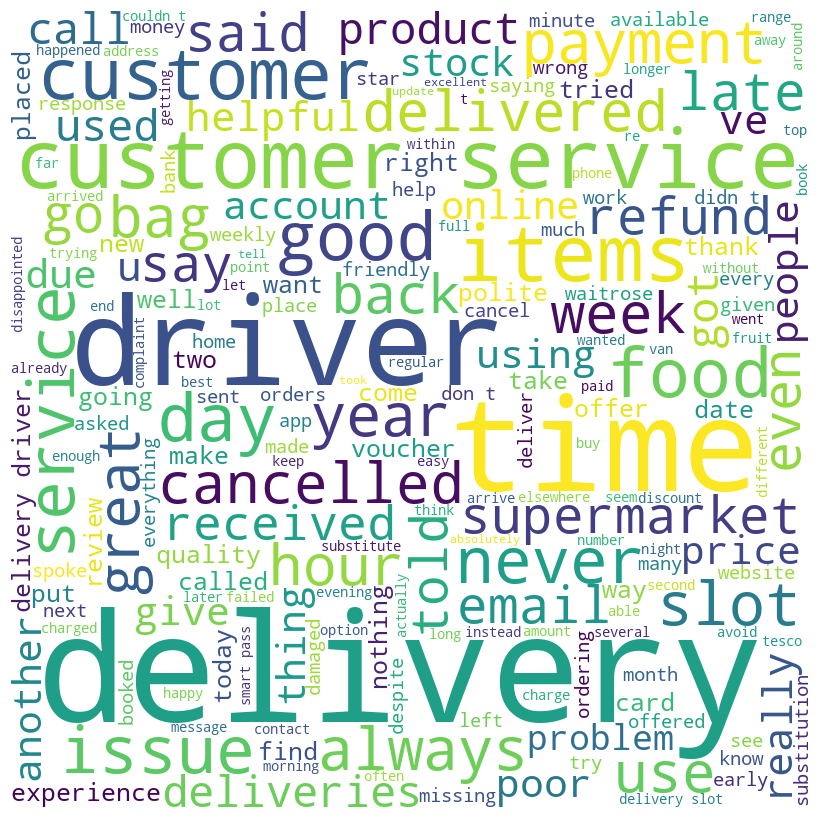

In [379]:
comment_words = ''
stopwords = set(STOPWORDS)

other_stopwords = {
    'ocado', 
    'christmas',
    'xmas',
    'order', 
    'item',
    'ordered',
    'now',
    'still',
    'first',
    'last',
    'shop',
    'shopping',
    'will',
    'one',
    's',
    'm',
    'need',
    'company'
}

stopwords.update(other_stopwords)
 
# iterate through the csv file
for val in ocado[ocado['review_date_original'].str.contains('2024')].review_text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### December

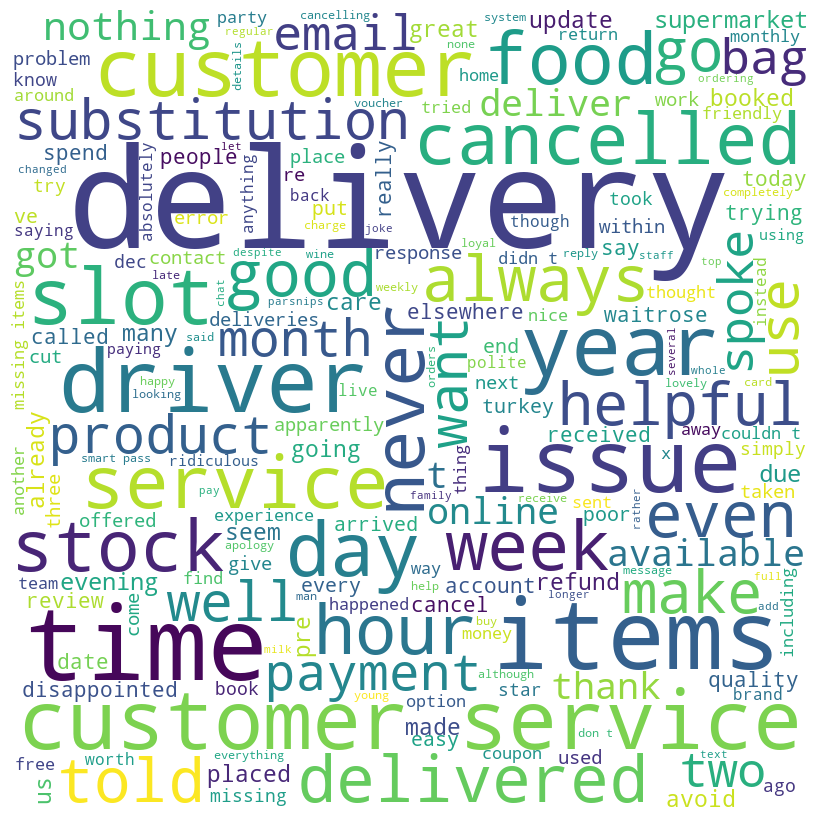

In [343]:
comment_words = ''
stopwords = set(STOPWORDS)

other_stopwords = {
    'ocado', 
    'christmas',
    'xmas',
    'order', 
    'item',
    'ordered',
    'now',
    'still',
    'first',
    'last',
    'shop',
    'shopping',
    'will',
    'one',
    's',
    'm',
    'need',
    'company'
}

stopwords.update(other_stopwords)
 
# iterate through the csv file
for val in ocado_december.review_text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [307]:
# ocado_december[ocado_december['review_text'].str.contains('delivery')].sort_values(by= 'rating', ascending = False)

In [311]:
# ocado_december[ocado_december['review_text'].str.contains('delivered')].sort_values(by= 'rating', ascending = False)

In [315]:
# ocado_december[ocado_december['review_text'].str.contains('items')].sort_values(by= 'rating', ascending = False)

## December, review = 1 or 2

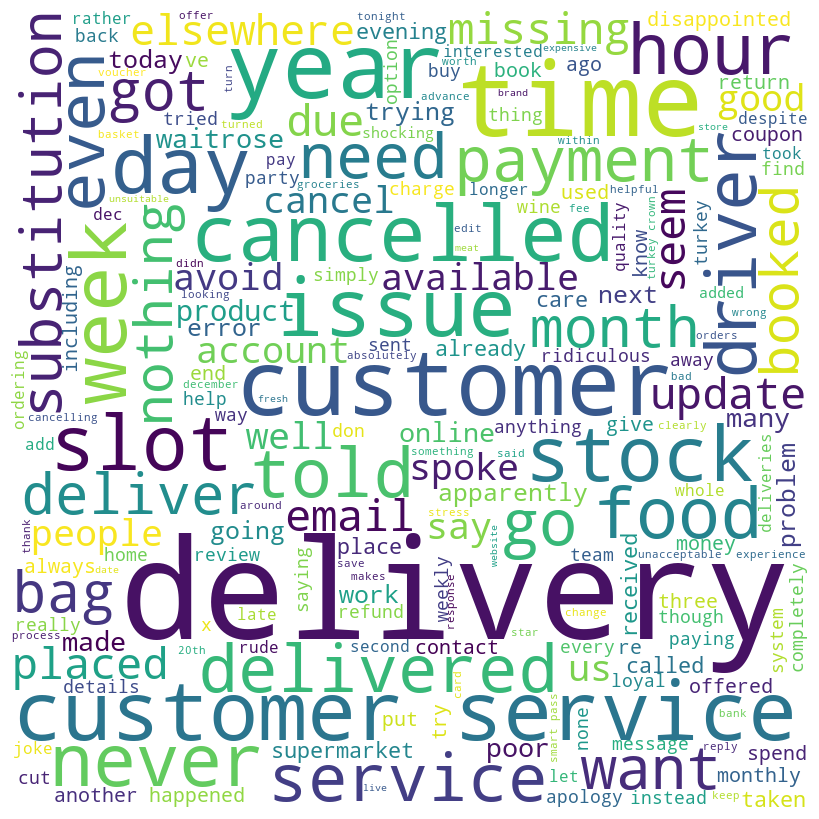

In [341]:
comment_words = ''
stopwords = set(STOPWORDS)

other_stopwords = {
    'ocado', 
    'christmas',
    'xmas',
    'order', 
    'item',
    'ordered',
    'now',
    'still',
    'first',
    'last',
    'shop',
    'shopping',
    'will',
    'one',
    's',
    't',
    'items',
    'two',
    'pre',
    'company',
    'couldn',
    'm',
    'make',
    'use'
    #'re'
}

stopwords.update(other_stopwords)
 
# iterate through the csv file
for val in ocado_december[(ocado_december['rating'] == '1') | (ocado_december['rating'] == '2')].review_text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

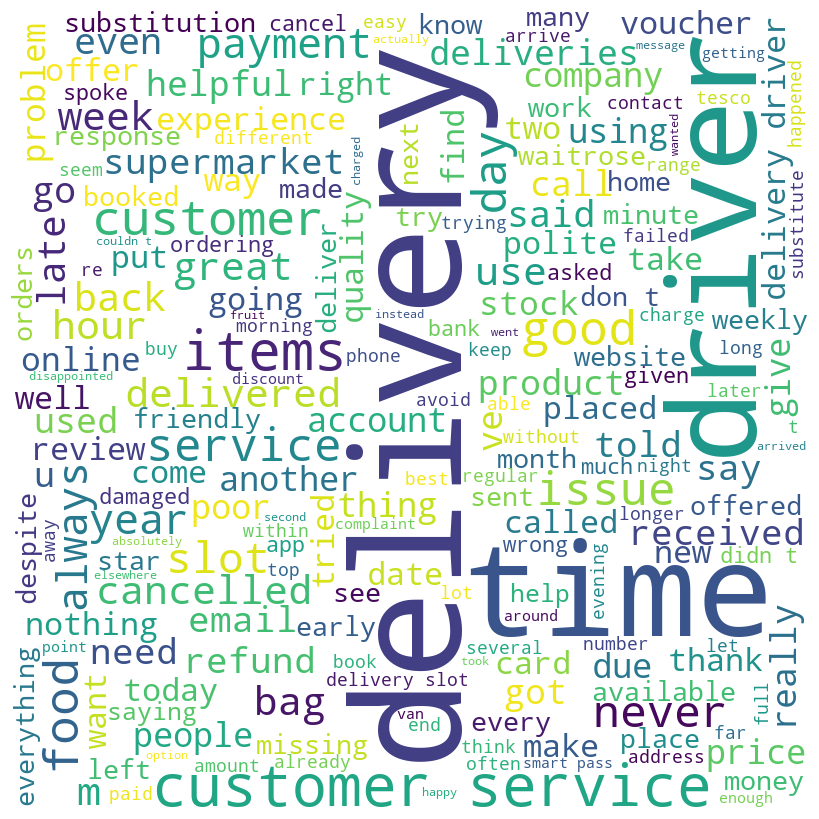

In [260]:
comment_words = ''
stopwords = set(STOPWORDS)

other_stopwords = {
    'ocado', 
    'christmas',
    'xmas',
    'order', 
    'item',
    'ordered',
    'now',
    'still',
    'first',
    'last',
    'shop',
    'shopping',
    'will',
    'one',
    's'
}

stopwords.update(other_stopwords)
 
# iterate through the csv file
for val in ocado.review_text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [235]:
type(stopwords)

set

### chatgpt

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from textblob import TextBlob
import re

# Assuming your dataset is loaded into the 'ocado' DataFrame

# Step 1: Basic Text Cleaning
def clean_text(text):
    # Remove non-alphabetical characters, extra spaces, and make everything lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I)
    text = text.lower()
    text = ' '.join(text.split())
    return text

# Apply the text cleaning function to the 'review_text' column
ocado['cleaned_review_text'] = ocado['review_text'].apply(clean_text)

# Step 2: Sentiment Analysis using TextBlob
def analyze_sentiment(text):
    # Analyze sentiment polarity (-1 to 1 scale)
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to the cleaned text
ocado['sentiment'] = ocado['cleaned_review_text'].apply(analyze_sentiment)

# Step 3: Word Frequency Analysis
# Using CountVectorizer to get the most frequent words
vectorizer = CountVectorizer(stop_words='english', max_features=20)
word_count = vectorizer.fit_transform(ocado['cleaned_review_text'])

# Convert the word counts to a DataFrame for easier viewing
word_count_df = pd.DataFrame(word_count.toarray(), columns=vectorizer.get_feature_names_out())

# Step 4: Generate a Word Cloud
wordcloud = WordCloud(stopwords='english', background_color='white', width=800, height=400).generate(' '.join(ocado['cleaned_review_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ocado Reviews')
plt.show()

# Step 5: Distribution of Review Ratings and Sentiment
# Plot sentiment distribution
plt.figure(figsize=(10, 6))
plt.hist(ocado['sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution for Reviews')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Step 6: Sentiment and Rating Correlation
# Map review_rating to numeric values for correlation
label_encoder = LabelEncoder()
ocado['rating_numeric'] = label_encoder.fit_transform(ocado['review_rating'])

plt.figure(figsize=(10, 6))
plt.scatter(ocado['rating_numeric'], ocado['sentiment'], alpha=0.6)
plt.title('Sentiment vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment')
plt.xticks(range(0, 5), ['1 star', '2 stars', '3 stars', '4 stars', '5 stars'])
plt.show()

# Optional: View most common words in the reviews
# Check the top 20 most frequent words
words_freq = word_count_df.sum(axis=0).sort_values(ascending=False).head(20)
print("Most common words in reviews:\n", words_freq)


TypeError: expected string or bytes-like object, got 'NoneType'

Example: "What do 10,000 coffee shop reviews reveal about customer expectations?"


In [130]:
# ASDA

# # 765 pages in total
# 
# from bs4 import BeautifulSoup
# import requests
# import pandas as pd
# 
# 
# data = []
# # Set Trustpilot page numbers to scrape here
# from_page = 1
# to_page = 20
# 
# for i in range(from_page, to_page + 1):
#     response = requests.get(f"https://uk.trustpilot.com/review/www.asda.com?page={i}")
#     web_page = response.text
#     soup = BeautifulSoup(web_page, "html.parser")
# 
#     for e in soup.select('article'):
#         data.append({
#             'review_title':e.h2.text,
#             'review_date_original': e.select_one('[data-service-review-date-of-experience-typography]').text.split(': ')[-1],
#             'review_rating':e.select_one('[data-service-review-rating] img').get('alt'),
#             'review_text': e.select_one('[data-service-review-text-typography]').text if e.select_one('[data-service-review-text-typography]') else None,
#             'page_number':i
#         })
# 
# pd.DataFrame(data)

### How to Find businessUnitId:
- Open the Trustpilot page for Ocado: https://uk.trustpilot.com/review/www.ocado.com
- Inspect the page’s source code by pressing Ctrl+U.
- Search for terms like "businessUnitId" or "businessId"

47783f540000640005020e3b